In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pydot

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,4

## Проектная работа по модулю “Математика и статистика в Python”
#### 1.Загрузить файл hr.csv.
#### 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
#### 3.Рассчитать и визуализировать корреляционную матрицу для переменных.
#### 4.Визуализировать несколько взаимосвязей между переменными.
#### 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
#### 6.Рассчитать сколько работников работает в каждом департаменте.
#### 7.Показать распределение сотрудников по зарплатам.
#### 8.Показать распределение сотрудников по зарплатам совместно с департаментами.
#### 9.Сколько сотрудников покинули компанию.
#### 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
#### 11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

##### 1.Загрузить файл hr.csv.

Загружаем файл. Его необходимо подготовить к анализу.

Таблица была проверена на нулевые значения, дубликаты, также было изменено название столбца. Дубликаты решил не удалять за неимением описания таблицы. Возможно, они были дополнены средними значениями.

In [3]:
hr = pd.read_csv('HR.csv')
hr[hr['salary'] == 'high'].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
72,0.45,0.49,2,149,3,0,1,0,product_mng,high
111,0.09,0.85,6,289,4,0,1,0,hr,high
189,0.44,0.51,2,156,3,0,1,0,technical,high
267,0.45,0.53,2,129,3,0,1,0,technical,high
306,0.37,0.46,2,149,3,0,1,0,marketing,high


In [5]:
hr.rename(index=str, columns={"sales": "department"}, inplace = True)

In [6]:
hr.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [7]:
hr.duplicated().sum()

3008

In [8]:
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [ ]:
"""
hr['salary'] = hr['salary'].map({'low': 0, 'medium': 1, 'high': 2})
hr.head()
"""

In [9]:
def salary_int(table):
    for row in table:
        if table.salary == 'high':
            return 3
        if table.salary == 'medium':
            return 2
        if table.salary == 'low':
            return 1

hr['salary_int'] = hr.apply(salary_int, axis = 1)
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,salary_int
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [10]:
del hr['salary']

##### 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [11]:
hr_description = hr.describe()
hr_description

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_int
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


In [12]:
hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary_int
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,1.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


##### 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

Для получения связей между зарплатой и другими переменными было принято решение создать переменную salary_int с примерными значениями затрат.

In [13]:
hr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_int
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary_int,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


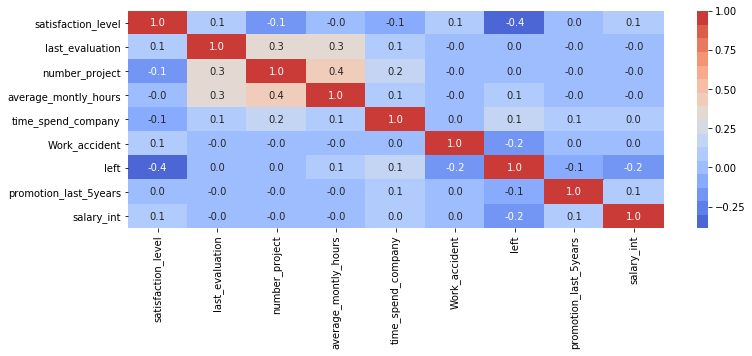

In [14]:
f, ax = plt.subplots()

sns.heatmap(hr.corr(), annot=True, fmt='.1f', ax=ax, cmap=sns.color_palette('coolwarm', 16))

##### 4.Визуализировать несколько взаимосвязей между переменными.

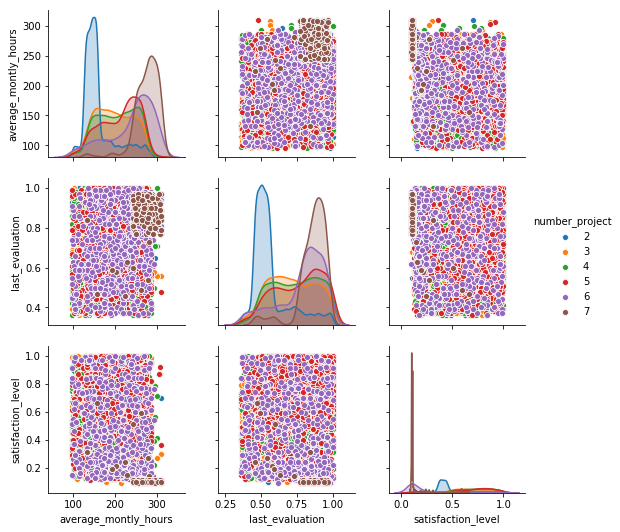

In [15]:
sns_testplot = sns.pairplot(hr,
    vars = ['average_montly_hours', 'last_evaluation', 'satisfaction_level'],
    hue = 'number_project')
sns_testplot

##### 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [17]:
overworked = hr[hr['department'] == 'management']['left']
big_nu_projects = hr[hr['department'] == 'IT']['left']
stats.ttest_ind(overworked, big_nu_projects)

Ttest_indResult(statistic=-4.026646311261713, pvalue=5.885682542264641e-05)

Статистически различимы

In [18]:
overworked = hr[hr['department'] == 'marketing']['number_project']
big_nu_projects = hr[hr['department'] == 'sales']['number_project']
stats.ttest_ind(overworked, big_nu_projects)

Ttest_indResult(statistic=-1.9104358901654255, pvalue=0.056134302045557534)

Выборки не имеют статистических различий

##### 6.Рассчитать сколько работников работает в каждом департаменте.

In [19]:
hr_dept = hr.groupby('department')['department'].count()
hr_dept

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

##### 7.Показать распределение сотрудников по зарплатам.

In [25]:
hr_sal = hr.groupby('salary_int').count().sort_values(by = 'department', ascending = False)
hr_sal['department']

salary_int
1    7316
2    6446
3    1237
Name: department, dtype: int64

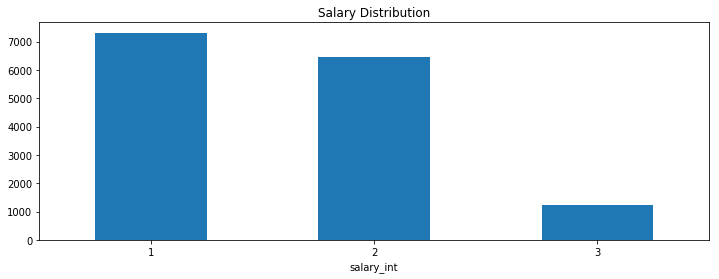

In [27]:
hr_sal['department'].plot(kind='bar', rot=0, title = 'Salary Distribution')

##### 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [29]:
hr_saldept = hr.groupby(['department', 'salary_int']).count().sort_values(by = ['department', 'salary_int'], ascending = False).satisfaction_level
hr_saldept

department   salary_int
technical    3              201
             2             1147
             1             1372
support      3              141
             2              942
             1             1146
sales        3              269
             2             1772
             1             2099
product_mng  3               68
             2              383
             1              451
marketing    3               80
             2              376
             1              402
management   3              225
             2              225
             1              180
hr           3               45
             2              359
             1              335
accounting   3               74
             2              335
             1              358
RandD        3               51
             2              372
             1              364
IT           3               83
             2              535
             1              609
Name: satisfacti

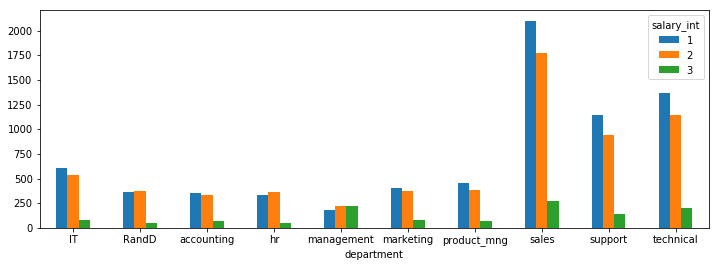

In [30]:
hr_saldept.unstack().plot(kind='bar', rot = 0)

##### 9.Сколько сотрудников покинули компанию.

In [31]:
left_= hr[hr['left'] == 1]
left_.count()['left']

3571

In [32]:
left_.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_int
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321,1.414730
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759,0.537341
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000,1.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000,1.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000,1.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000,2.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000,3.000000


##### 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

Для начала посмотрим на общую ситуацию по отделам. Как видно на графике ниже, все отделы чувствуют себя примерно одинаково.

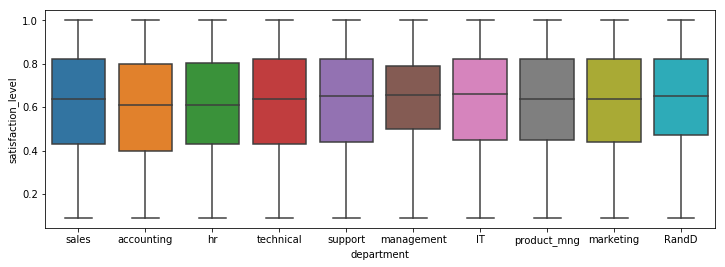

In [33]:
sns.boxplot(x="department", y="satisfaction_level", 
            data=hr)

Давайте прямо займемся вопросом ушедших из компании и будем рассматривать причины, почему люди ушли.

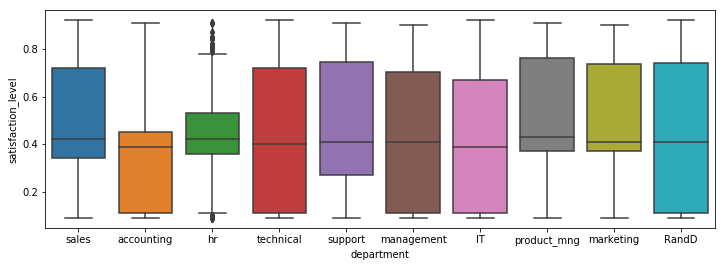

In [34]:
sns.boxplot(x="department", y="satisfaction_level", 
            data=left_)

Как можно заметить на бокс-плоте выше, причины ухода **не всегда зависели от уровня удовлетворения** работой. Более того, некоторые отделы, такие как продакт-менеджеры, маркетологи и продажники, показывают даже очень приличные результаты по уровню удовлетворения среди ушедших. 

В таком случае, главной причиной ухода не всегда было недовольство компанией. Поэтому давайте рассмотрим эту картину в общем.

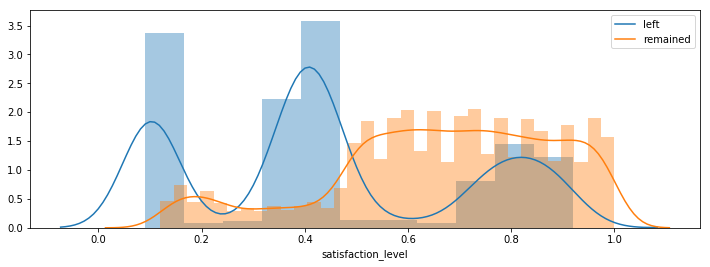

In [35]:
left = hr[hr['left'] == 1 ]['satisfaction_level']
remained = hr[hr['left'] == 0 ]['satisfaction_level']
sns.distplot(left, kde_kws={"label": "left"})
sns.distplot(remained, kde_kws={"label": "remained"})
plt.show()

Из графика видно, что в принципе ушедших из компании можно поделить на три различные группы.

Давайте посмотрим на хитмэп и корреляцию признаков ушедших:

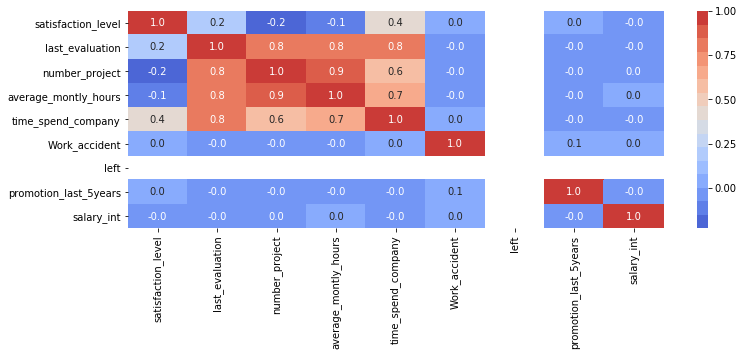

In [36]:
f, ax = plt.subplots()

sns.heatmap(left_.corr(), annot=True, fmt='.1f', ax=ax, cmap=sns.color_palette('coolwarm', 16))

Можно проследить сильную взаимосвязь между параметрами оценки персонала, количеством проектов и среднем проведенном времени на работе в месяц.

Помните график из пункта 4? Там уже бросались в глаза некоторые группировки и закономерности. Давайте освежим его в памяти.

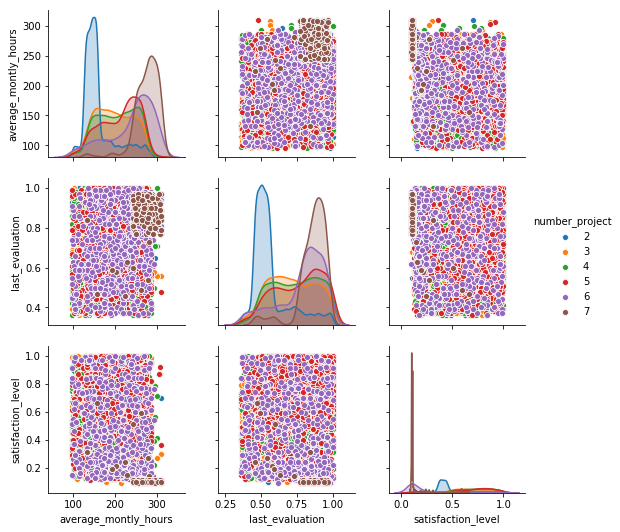

In [37]:
sns_testplot = sns.pairplot(hr,
    vars = ['average_montly_hours', 'last_evaluation', 'satisfaction_level'],
    hue = 'number_project')
sns_testplot

Теперь по аналогии построим такой же график, но уже выделим ушедших из компании.

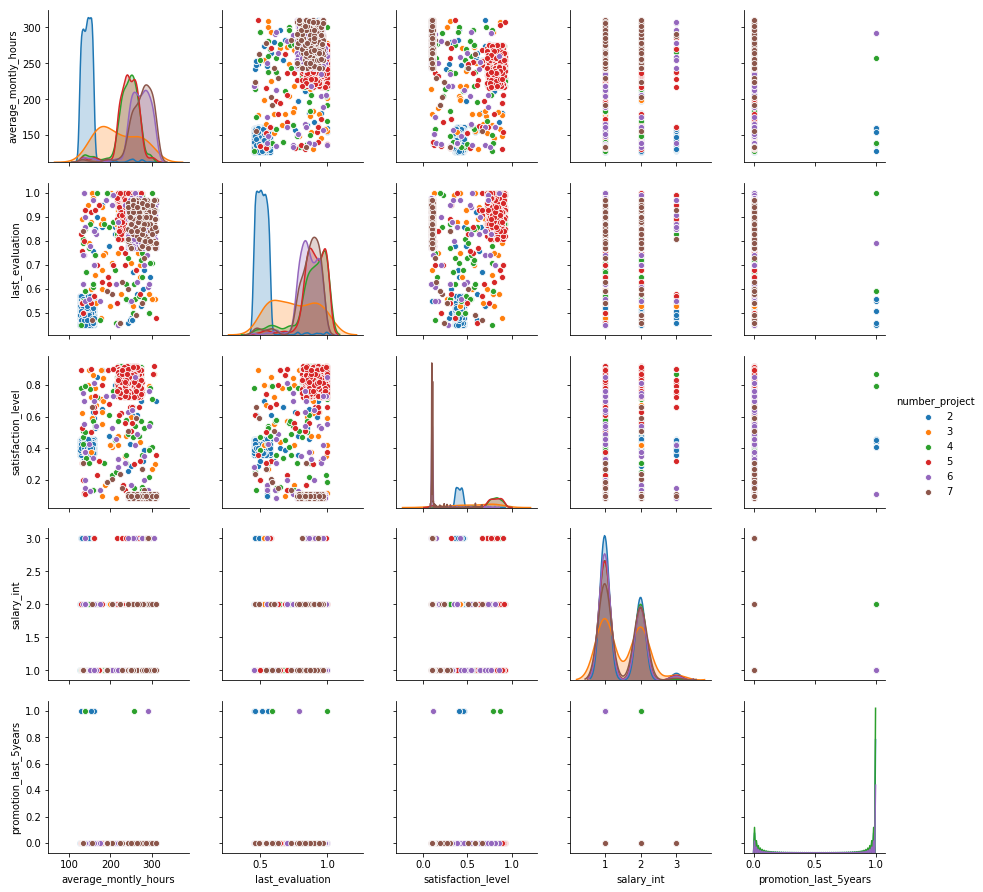

In [39]:
sns_left_plot = sns.pairplot(left_,
    vars = ['average_montly_hours', 'last_evaluation', 'satisfaction_level', 'salary_int', 'promotion_last_5years'],
    hue = 'number_project')
sns_left_plot

#### После данного графика можно отразить основные выявленные признаки по поводу ушедших сотрудников:
* *Сотрудники компании с 7-ю проектами имели основной костяк из 'недовольных' (3 табл, 3 ряд);*
* *Наряду с частью коллег с 6-ю проектами сотрудники с 7-ю проектами имели наибольшее количество переработанных часов. Вторая группа включала в себя людей с 4, 5 и частично 6-ю проектами. Третья группа включает работников с 2 проектами. Также достаточно равномерно распределены часы работы уволившихся людей с 4-мя проектами между этими группами. Отсюда можно сделать вывод, что количество часов почти полностью коррелирует с количеством проектом (1 табл, 1 ряд);*
* *Вдобавок к переработкам и большому числу проектов, большинство (судя по медиане, чуть более 50%) сотрудников с 7 проектами также имели маленькую зарплату, плюс их не повышали за последние 5 лет. Это можно увидеть в (табл 4 ряд 4), (табл 4 ряд 5, или же таблицы 5 всех рядов, или же все таблицы пятого ряда);*
* *Оценка персонала за 2 года выявила примерно такие же показатели и группы, что и в п.2, разве что группы 1 и 2 располагаются кучнее;* 
* *Стоит предполагать, что уровень удовлетворения у сотрудников с 5-ю проектами был высокий, так как у них было меньше проектов, меньше переработок, хорошие результаты оценки, а также были повышения и была достаточно хорошая зарплата, но это не спасло от ухода перерабатывающих. История людей с 4-мя проектами очень схожа с данной ситуацией*

In [40]:
helpful_2 = hr[hr['number_project'] ==2]
helpful_3 = hr[hr['number_project'] ==3]
helpful_4 = hr[hr['number_project'] ==4]
helpful_5 = hr[hr['number_project'] ==5]
helpful_6 = hr[hr['number_project'] ==6]
helpful_7 = hr[hr['number_project'] ==7]

Если до этого можно было сказать, что все подгруппы с количеством проектов уходили из-за переработок, подкрепленными более низкой зарплатой и неповышением, ситуация с сотрудниками с 2-мя и 3-мя проектами обстоит несколько иначе. Давайте сначала рассмотрим сотрудников с 3-мя проектами.

In [41]:
helpful_3.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_int
count,4055.000000,4055.000000,4055.0,4055.000000,4055.000000,4055.000000,4055.000000,4055.000000,4055.000000
mean,0.687670,0.716572,3.0,197.507522,3.286560,0.175092,0.017756,0.023428,1.658940
std,0.195176,0.159414,0.0,44.610349,1.596047,0.380093,0.132079,0.151277,0.652745
min,0.090000,0.360000,3.0,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.560000,0.590000,3.0,161.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.700000,0.710000,3.0,196.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.840000,0.850000,3.0,236.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,3.0,309.000000,10.000000,1.000000,1.000000,1.000000,3.000000


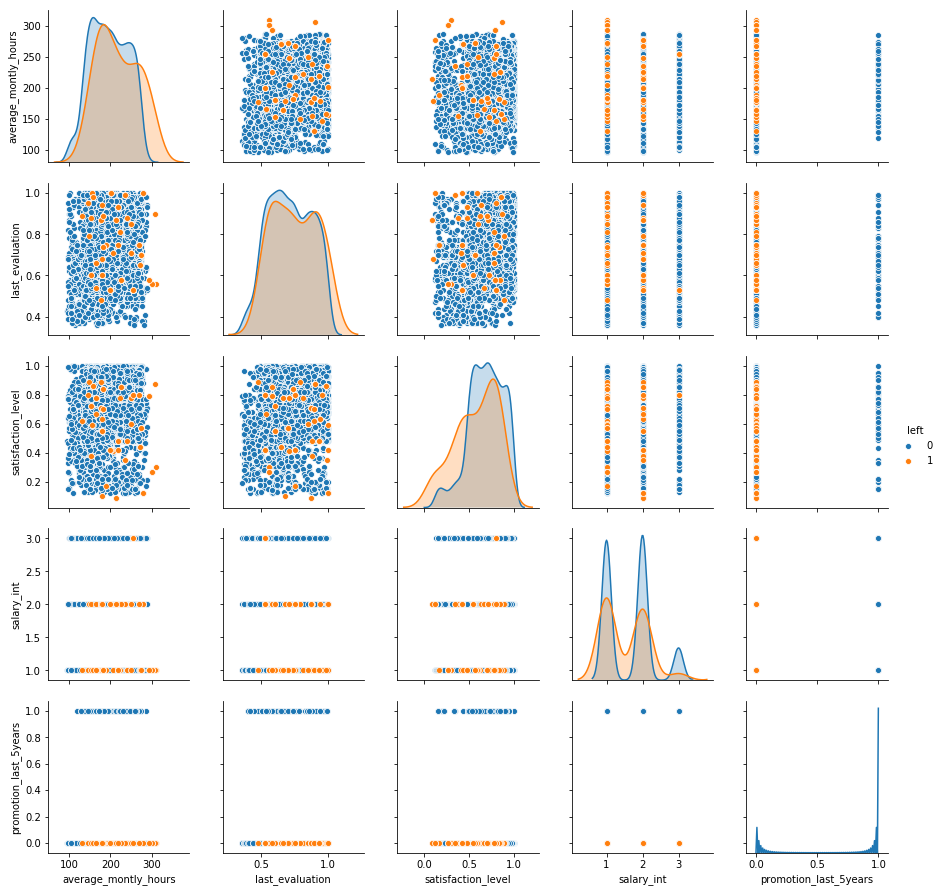

In [42]:
sns_helpful_3_plot = sns.pairplot(helpful_3,
    vars = ['average_montly_hours', 'last_evaluation', 'satisfaction_level', 'salary_int', 'promotion_last_5years'],
    hue = 'left')
sns_helpful_3_plot

Как можно заметить, существенных различий в процессе работы у них не было. В данном случае видно невооруженным глазом, что люди уходили из-за того, что их не повышали и не повышали зарплату. Также можно отметить, что в данной подгруппе сотрудники были готовы работать больше в случае повышения и повышения зарплаты.

Теперь давайте аналогичным образом рассмотрим 3 выделяющуюся группу - сотрудников с 2-мя проектами.

In [43]:
helpful_2.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_int
count,2388.000000,2388.000000,2388.0,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000
mean,0.478769,0.568505,2.0,160.342546,3.180486,0.092965,0.656198,0.015494,1.495812
std,0.158772,0.134159,0.0,38.849089,0.946232,0.290444,0.475076,0.123533,0.606126
min,0.100000,0.360000,2.0,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.390000,0.480000,2.0,136.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.430000,0.530000,2.0,149.000000,3.000000,0.000000,1.000000,0.000000,1.000000
75%,0.490000,0.570000,2.0,160.000000,3.000000,0.000000,1.000000,0.000000,2.000000
max,1.000000,1.000000,2.0,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


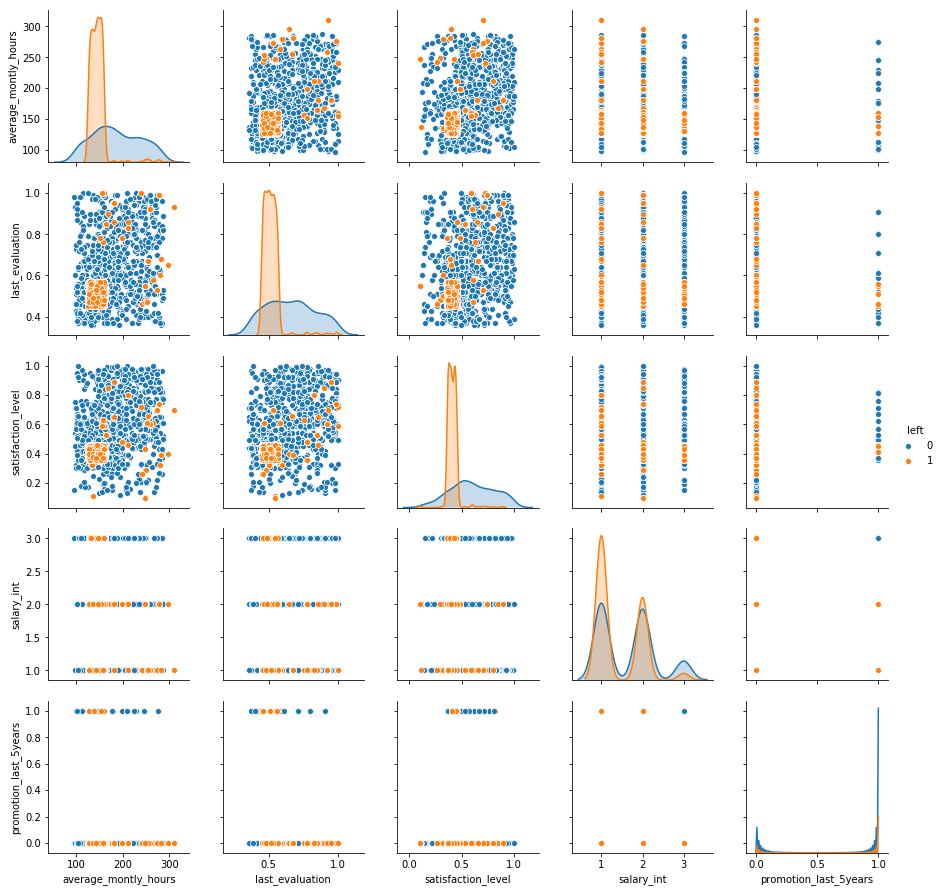

In [44]:
sns_helpful_2_plot = sns.pairplot(helpful_2,
    vars = ['average_montly_hours', 'last_evaluation', 'satisfaction_level', 'salary_int', 'promotion_last_5years'],
    hue = 'left')
sns_helpful_2_plot

Ситуация с данной подгруппой складывается интересно. Здесь уходили сотрудники откуда угодно. Также есть небольшое количество перерабатывающих, неповышенных и с более низкой зарплатой, которые показывали очень хорошую оценку, однако здесь выделаяется довольно внушительная группа с показателями оценки ниже среднего, причем солидное количество сотрудников из них - с высокой зарплатой и не с самыми большими часами работы в месяц. Всего покинуло данную подгруппу примерно 1500 человек. 

#### Основные выводы исследования

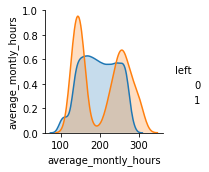

In [45]:
final_plot = sns.pairplot(hr,
    vars = ['average_montly_hours'],
    hue = 'left')
final_plot

Есть вероятность полагать, что одним из истоков проблемы ухода такого количества сотрудников является **увольнение за плохие показатели и недоработки большого ряда сотрудников** (ушло 3,5 тыс. человек) , в результате чего появились следующие проблемы:
* В связи с уходом сотрудников появилось много проектов, которые необходимо было выполнять;
* В результате у некоторых сотрудников начались переработки;
* Систематически дополнительные проекты и рабочие часы назначались людям с отличным показателем last_evaluation;
* В дополнение к этому не была правильно проработана система вознаграждений, и сотрудники работали за "спасибо";
* К тому же таких сотрудников еще и не повышали (у сотрудников с 7-ю проектами ни одного повышения);
* Если работники с меньшим количеством проектов еще и готовы были работать больше с повышением заработной платы, то сотрудники с сильной переработкой - нет.

Возможно, переработок было очень много среди работников низшего звена. В таком случае, там - высокая текучка кадров. Такое часто случается в агентствах, консалтинговых компаниях и многих других, где, чаще всего, студентов используют как расходный материал, а они, в свою очередь, набираются опыта и уходят работать в другие компании. Если компания все же хочет избавиться от высокой текучки, возможно, ей стоит правильно выстроить систему управления.

#### Рекомендации

* Перераспределить проекты и нагрузку в целом более равномерно;
* Заново продумать систему вознаграждений, поощрений сотрудников. 
